In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shelter-animal-outcomes/sample_submission.csv.gz
/kaggle/input/shelter-animal-outcomes/train.csv.gz
/kaggle/input/shelter-animal-outcomes/test.csv.gz


In [2]:
train=pd.read_csv("/kaggle/input/shelter-animal-outcomes/train.csv.gz")
test=pd.read_csv("/kaggle/input/shelter-animal-outcomes/test.csv.gz")
pd.options.display.max_columns=99
display(train,test)

AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0      A671945  Hambone  2014-02-12 18:22:00  Return_to_owner            NaN   
1      A656520    Emily  2013-10-13 12:44:00       Euthanasia      Suffering   
2      A686464   Pearce  2015-01-31 12:28:00         Adoption         Foster   
3      A683430      NaN  2014-07-11 19:09:00         Transfer        Partner   
4      A667013      NaN  2013-11-15 12:52:00         Transfer        Partner   
...        ...      ...                  ...              ...            ...   
26724  A702446      NaN  2015-05-14 11:56:00         Transfer        Partner   
26725  A718934      NaN  2016-01-20 18:59:00         Transfer           SCRP   
26726  A698128     Zeus  2015-03-09 13:33:00         Adoption            NaN   
26727  A677478      NaN  2014-04-27 12:22:00         Transfer        Partner   
26728  A706629      NaN  2015-07-02 09:00:00         Transfer           SCRP   

      AnimalType SexuponOutcome AgeuponOutcome                        Breed  \
0            Dog  Neutered Male         1 year        Shetland Sheepdog Mix   
1            Cat  Spayed Female         1 year       Domestic Shorthair Mix   
2            Dog  Neutered Male        2 years                 Pit Bull Mix   
3            Cat    Intact Male        3 weeks       Domestic Shorthair Mix   
4            Dog  Neutered Male        2 years  Lhasa Apso/Miniature Poodle   
...          ...            ...            ...                          ...   
26724        Cat    Intact Male        1 month       Domestic Shorthair Mix   
26725        Cat  Spayed Female       3 months       Domestic Shorthair Mix   
26726        Dog  Neutered Male        4 years      Old English Bulldog Mix   
26727        Cat    Intact Male        4 weeks       Domestic Shorthair Mix   
26728        Cat    Intact Male         1 year       Domestic Shorthair Mix   

                   Color  
0            Brown/White  
1            Cream Tabby  
2             Blue/White  
3             Blue Cream  
4                    Tan  
...                  ...  
26724  Brown Tabby/White  
26725        Brown Tabby  
26726          White/Tan  
26727              Black  
26728  Brown Tabby/White  

[26729 rows x 10 columns]

ID      Name             DateTime AnimalType SexuponOutcome  \
0          1    Summer  2015-10-12 12:15:00        Dog  Intact Female   
1          2  Cheyenne  2014-07-26 17:59:00        Dog  Spayed Female   
2          3       Gus  2016-01-13 12:20:00        Cat  Neutered Male   
3          4     Pongo  2013-12-28 18:12:00        Dog    Intact Male   
4          5   Skooter  2015-09-24 17:59:00        Dog  Neutered Male   
...      ...       ...                  ...        ...            ...   
11451  11452       NaN  2014-07-08 14:50:00        Cat  Neutered Male   
11452  11453       NaN  2014-10-21 12:57:00        Cat  Intact Female   
11453  11454       NaN  2014-09-29 09:00:00        Cat  Intact Female   
11454  11455     Rambo  2015-09-05 17:16:00        Dog  Neutered Male   
11455  11456     Gusto  2014-07-12 18:40:00        Dog    Intact Male   

      AgeuponOutcome                           Breed        Color  
0          10 months          Labrador Retriever Mix    Red/White  
1            2 years  German Shepherd/Siberian Husky    Black/Tan  
2             1 year          Domestic Shorthair Mix  Brown Tabby  
3           4 months               Collie Smooth Mix     Tricolor  
4            2 years            Miniature Poodle Mix        White  
...              ...                             ...          ...  
11451       2 months          Domestic Shorthair Mix        Black  
11452        2 weeks          Domestic Shorthair Mix         Blue  
11453         1 year          Domestic Shorthair Mix       Calico  
11454        6 years             German Shepherd Mix    Black/Tan  
11455        4 years              Labrador Retriever        Cream  

[11456 rows x 8 columns]

'AgeuponOutcome'연령의 단위가 다르게 있어 train과정에 어려움이 있을 것으로 보고, 모두 day로 변환한다.

In [3]:
alldata=pd.concat([train,test])
alldata["DateTime"]=pd.to_datetime(alldata["DateTime"])
alldata["Year"]=alldata["DateTime"].dt.year
alldata["Month"]=alldata["DateTime"].dt.month
alldata["Day"]=alldata["DateTime"].dt.day
alldata["Hour"]=alldata["DateTime"].dt.hour
alldata["Weekday"]=alldata["DateTime"].dt.weekday
alldata["Minute"]=alldata["DateTime"].dt.minute

def agetransformation(x) :
    if pd.isnull(x):
        return -1
    num=int(x.split()[0])
    if 'year' in x:
        return num*365
    elif 'month' in x:
        return num*30
    elif 'week' in x:
        return num*7
    else :
        return num*1
    
alldata["AgeuponOutcome"]=alldata["AgeuponOutcome"].apply(agetransformation)
alldata

AnimalID     Name            DateTime      OutcomeType OutcomeSubtype  \
0      A671945  Hambone 2014-02-12 18:22:00  Return_to_owner            NaN   
1      A656520    Emily 2013-10-13 12:44:00       Euthanasia      Suffering   
2      A686464   Pearce 2015-01-31 12:28:00         Adoption         Foster   
3      A683430      NaN 2014-07-11 19:09:00         Transfer        Partner   
4      A667013      NaN 2013-11-15 12:52:00         Transfer        Partner   
...        ...      ...                 ...              ...            ...   
11451      NaN      NaN 2014-07-08 14:50:00              NaN            NaN   
11452      NaN      NaN 2014-10-21 12:57:00              NaN            NaN   
11453      NaN      NaN 2014-09-29 09:00:00              NaN            NaN   
11454      NaN    Rambo 2015-09-05 17:16:00              NaN            NaN   
11455      NaN    Gusto 2014-07-12 18:40:00              NaN            NaN   

      AnimalType SexuponOutcome  AgeuponOutcome                        Breed  \
0            Dog  Neutered Male             365        Shetland Sheepdog Mix   
1            Cat  Spayed Female             365       Domestic Shorthair Mix   
2            Dog  Neutered Male             730                 Pit Bull Mix   
3            Cat    Intact Male              21       Domestic Shorthair Mix   
4            Dog  Neutered Male             730  Lhasa Apso/Miniature Poodle   
...          ...            ...             ...                          ...   
11451        Cat  Neutered Male              60       Domestic Shorthair Mix   
11452        Cat  Intact Female              14       Domestic Shorthair Mix   
11453        Cat  Intact Female             365       Domestic Shorthair Mix   
11454        Dog  Neutered Male            2190          German Shepherd Mix   
11455        Dog    Intact Male            1460           Labrador Retriever   

             Color       ID  Year  Month  Day  Hour  Weekday  Minute  
0      Brown/White      NaN  2014      2   12    18        2      22  
1      Cream Tabby      NaN  2013     10   13    12        6      44  
2       Blue/White      NaN  2015      1   31    12        5      28  
3       Blue Cream      NaN  2014      7   11    19        4       9  
4              Tan      NaN  2013     11   15    12        4      52  
...            ...      ...   ...    ...  ...   ...      ...     ...  
11451        Black  11452.0  2014      7    8    14        1      50  
11452         Blue  11453.0  2014     10   21    12        1      57  
11453       Calico  11454.0  2014      9   29     9        0       0  
11454    Black/Tan  11455.0  2015      9    5    17        5      16  
11455        Cream  11456.0  2014      7   12    18        5      40  

[38185 rows x 17 columns]

In [4]:
alldata2=alldata.drop(columns=["AnimalID","OutcomeType","OutcomeSubtype","DateTime","ID"])
alldata2

Name AnimalType SexuponOutcome  AgeuponOutcome  \
0      Hambone        Dog  Neutered Male             365   
1        Emily        Cat  Spayed Female             365   
2       Pearce        Dog  Neutered Male             730   
3          NaN        Cat    Intact Male              21   
4          NaN        Dog  Neutered Male             730   
...        ...        ...            ...             ...   
11451      NaN        Cat  Neutered Male              60   
11452      NaN        Cat  Intact Female              14   
11453      NaN        Cat  Intact Female             365   
11454    Rambo        Dog  Neutered Male            2190   
11455    Gusto        Dog    Intact Male            1460   

                             Breed        Color  Year  Month  Day  Hour  \
0            Shetland Sheepdog Mix  Brown/White  2014      2   12    18   
1           Domestic Shorthair Mix  Cream Tabby  2013     10   13    12   
2                     Pit Bull Mix   Blue/White  2015      1   31    12   
3           Domestic Shorthair Mix   Blue Cream  2014      7   11    19   
4      Lhasa Apso/Miniature Poodle          Tan  2013     11   15    12   
...                            ...          ...   ...    ...  ...   ...   
11451       Domestic Shorthair Mix        Black  2014      7    8    14   
11452       Domestic Shorthair Mix         Blue  2014     10   21    12   
11453       Domestic Shorthair Mix       Calico  2014      9   29     9   
11454          German Shepherd Mix    Black/Tan  2015      9    5    17   
11455           Labrador Retriever        Cream  2014      7   12    18   

       Weekday  Minute  
0            2      22  
1            6      44  
2            5      28  
3            4       9  
4            4      52  
...        ...     ...  
11451        1      50  
11452        1      57  
11453        0       0  
11454        5      16  
11455        5      40  

[38185 rows x 12 columns]

cat boost classifier에서 가장 정확도가 높은 alldata2 set// 다른 model 사용의 경우 "DateTime" column이 drop되어야 오류가 발생하지 않음

In [5]:
# alldata2=alldata.drop(columns=["AnimalID","OutcomeType","OutcomeSubtype","ID"])
# alldata2

In [6]:
# alldata2=alldata.drop(columns=["AnimalID","OutcomeType","OutcomeSubtype","ID","SexuponOutcome"])
# alldata2

In [7]:
alldata["AgeuponOutcome"].unique()

array([ 365,  730,   21,   30,  150, 1460,   90,   14,   60,  300,  180,
       1825, 2555, 1095,  120, 4380, 3285, 2190,    7, 4015,   28,  210,
       2920,  330,    4,  270,  240, 5475, 3650,    0, 5110,    3,    6,
          5,   35,    2, 5840,    1, 4745,   -1, 6205, 6570, 6935, 7300,
       8030])

도표를 통해, adoption이 17~18시에 많기 때문에 출 퇴근 시간의 영향이 있음을 알 수 있다.
0~9, 19~24 구간에서 count의 갯수가 현저히 낮아지므로 사람의 여가 및 수면 시간과도 관계있음을 알 수 있다.
catboostclassifier를 이용하고, DateTime column을 삭제하였을때 score는 0.74015였으나 DateTime Column을 추가하니 score는 0.73824로 개선되었다(score 낮을 수록 순위 개선) DateTime의 날짜형식을 인식할 수 있는 것이 CatBoostClassifier가 가지는 장점 중 하나이다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Hour', ylabel='count'>

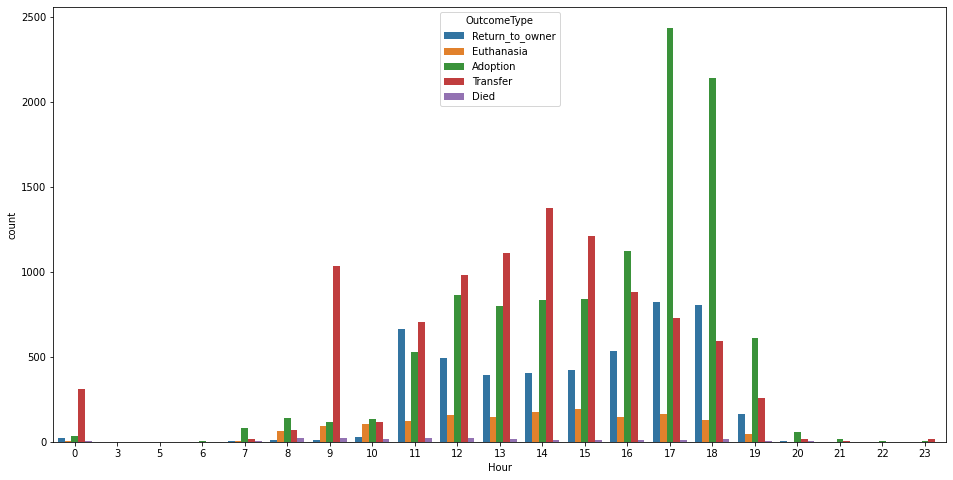

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.countplot(alldata["Hour"],hue=alldata["OutcomeType"])

도표를 통해 adoption(입양)은 대부분 연령이 낮은 동물에게서 나타남을 알 수 있다(연령과 분석의 target인  outcometype은 상관관계가 있다)

In [9]:
plt.figure(figsize=(16,8))
sns.boxplot(alldata["OutcomeType"],alldata["AgeuponOutcome"],showfliers=False,hue=alldata["SexuponOutcome"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OutcomeType', ylabel='AgeuponOutcome'>

중성화 되었을 때, 다른 OutcomeType에 비해 입양비율이 현저히 높음을 알 수 있다.
따라서 train과정에 SexuponOutcome  column을 포함 시켜야 하며, column을 포함하지 않았을때 score가 개선되지 않고 더 나빠짐을 알수있다.
CatBoostModel에서 score 0.73824였던 조건에 SexuponOutcome 컬럼만 삭제하였더니 score 0.81490으로 변경되었다.

In [10]:
plt.figure(figsize=(16,8))
sns.countplot(alldata["SexuponOutcome"],hue=alldata["OutcomeType"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SexuponOutcome', ylabel='count'>

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

category=alldata2.columns[alldata2.dtypes=='object']
for col in category:
    alldata2[col]=le.fit_transform(list(alldata2[col]))
    
alldata2

Name  AnimalType  SexuponOutcome  AgeuponOutcome  Breed  Color  Year  \
0      2910           1               2             365   1482    146  2014   
1      2265           0               3             365    775    184  2013   
2      5500           1               2             730   1293     97  2015   
3      7968           0               1              21    775     47  2014   
4      7968           1               2             730   1101    311  2013   
...     ...         ...             ...             ...    ...    ...   ...   
11451  7968           0               2              60    775      6  2014   
11452  7968           0               0              14    775     46  2014   
11453  7968           0               0             365    775    156  2014   
11454  5964           1               2            2190    841     40  2015   
11455  2876           1               1            1460   1022    183  2014   

       Month  Day  Hour  Weekday  Minute  
0          2   12    18        2      22  
1         10   13    12        6      44  
2          1   31    12        5      28  
3          7   11    19        4       9  
4         11   15    12        4      52  
...      ...  ...   ...      ...     ...  
11451      7    8    14        1      50  
11452     10   21    12        1      57  
11453      9   29     9        0       0  
11454      9    5    17        5      16  
11455      7   12    18        5      40  

[38185 rows x 12 columns]

In [12]:
train2=alldata2[:len(train)]
test2=alldata2[len(train):]

CatBoostClassifier score:0.74015 (score가 낮을수록 순위 향상, rfc보다는 cbc가 더 정확한 예측 모델 (오류가 발생할 경우 지속해서 보정하기 때문이다 / cbc 사용에서 분석 시간이 너무 길지 않았기 때문에 더 적합)
-범주형 변수를 처리하는데 유용
-level-wise방식
-과대적합을 방지하기 위한 기법들이 다수 포함
-데이터를 랜덤하게 셔플링하여 사용
-다른 부스팅에 비해 비교적 하이퍼파라미터 최적화가 잘 되어 있

In [13]:
from catboost import CatBoostClassifier
cbc=CatBoostClassifier(verbose=100)
cbc.fit(train2,train["OutcomeType"])

result=cbc.predict_proba(test2)
result

Learning rate set to 0.093562
0:	learn: 1.4703223	total: 71.4ms	remaining: 1m 11s
100:	learn: 0.7474971	total: 1.61s	remaining: 14.4s
200:	learn: 0.7070210	total: 3.11s	remaining: 12.4s
300:	learn: 0.6746519	total: 4.65s	remaining: 10.8s
400:	learn: 0.6461705	total: 6.18s	remaining: 9.23s
500:	learn: 0.6212625	total: 7.72s	remaining: 7.69s
600:	learn: 0.5979028	total: 9.27s	remaining: 6.16s
700:	learn: 0.5765164	total: 10.8s	remaining: 4.6s
800:	learn: 0.5570537	total: 12.3s	remaining: 3.05s
900:	learn: 0.5387021	total: 13.9s	remaining: 1.53s
999:	learn: 0.5208813	total: 15.4s	remaining: 0us


array([[2.81584957e-02, 2.21831975e-03, 7.79193979e-02, 2.54228354e-01,
        6.37475433e-01],
       [6.53466915e-01, 1.60713027e-04, 8.01670255e-03, 3.15979530e-01,
        2.23761391e-02],
       [4.67422684e-01, 1.03428028e-03, 1.10383341e-02, 1.11178304e-01,
        4.09326398e-01],
       ...,
       [7.02888856e-04, 6.02495713e-03, 5.35806192e-03, 9.44919865e-04,
        9.86969172e-01],
       [5.09586666e-01, 1.37543477e-03, 9.87739265e-03, 4.27844202e-01,
        5.13163049e-02],
       [8.17291724e-02, 1.49440796e-03, 1.20334687e-01, 6.12336480e-01,
        1.84105253e-01]])

RandomForestClassifier score 0.83696
-결정트리 모델의 과대적합을 통계적으로 해소
-결정트리모델처럼 직관적
-앙상블 모델중 비교적 빠른 속도
-모델 튜닝을 위한 시간이 많이 필요
-큰데이터 세트에도 잘 작동하지만 시간이 오래걸림
-트리의 개수가 많아져서
-training과정의 오류를 보정하지 않아 GRADIENT/CAT BOOST보다 정확도가 낮다.

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(train2,train["OutcomeType"])
result=rfc.predict_proba(test2)

GradientBoostingClassifier를 사용했을 때 score 0.76171로 RandomForestClassifier보다 개선되었다. 그러나 Cat Boost Classifier가 더 높다. 
GradientBoostingClassifier
-ada 부스팅과 기본 개념 동일
-가중치를 계산하는 방식에서 경시하강법을 사용
-학습속도가 느림
-특성 스케일을 조절할 필요가 없음(트리기반 모델)
SanFranciscoCrimeClassifier는  1762311 rows × 6 columns, 이번 데이터는 38185 rows × 12 columns로 약 23배 데이터의 크기가 작아 train및 predict에 시간이 더 적게 들었고, 빠른 시간 안에 적용할 수 있었다.

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=0)
gbc.fit(train2,train["OutcomeType"])
result=gbc.predict_proba(test2)
result

array([[4.27993417e-02, 4.79213173e-03, 4.20526611e-02, 2.38160059e-01,
        6.72195807e-01],
       [6.87368648e-01, 6.17870538e-04, 1.02365106e-02, 2.44929386e-01,
        5.68475845e-02],
       [4.13345131e-01, 4.83263364e-03, 1.33157311e-02, 1.18887221e-01,
        4.49619283e-01],
       ...,
       [3.26446508e-03, 2.73996157e-03, 1.46132117e-02, 4.29836743e-03,
        9.75083994e-01],
       [5.05370820e-01, 1.06387942e-03, 1.83918940e-02, 4.19116761e-01,
        5.60566455e-02],
       [8.95909940e-02, 3.92833646e-03, 1.11641507e-01, 6.61491074e-01,
        1.33348088e-01]])

xgboost classifier: 0.76171로 gradientboostinc과 동일
1. 뛰어난 예측 성능 : 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘
2. GBM 대비 빠른 수행시간 : 일반적인 GBM은 순차적으로 weak learner가 가중치를 증감하는 방법으로 학습하기 때문에 전반적으로 속도가 느림. XGBOOST는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능 보장. 
3. 과적합 규제 : 표준 GBM의 경우 과적합 규제 기능이 없으나 XGBOOST는 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성
4. 나무 가지치기 : 일반적으로 GBM은 분할 시 부정 손실이 발생하면 분ㄴ할을 더 이상 수행하지 않지만 이러한 방식도 자칫 지나치게 많은 분할을 발생할 수 있음. 다른 GBM과 마찬가지로 XGBOOST도 max_depth 파라미터로 분할 깊이를 조정하기도 하지만 tree pruning으로 더이상 긍정 이득이 없는 분할을 가지치기해서 분할 수를 더 줄이는 장점이 있음.
5. 자체 내장된 교차 검증 : xgboost는 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있음. 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있음
6. 결손값 자체 처리 XGBoost는 결손값을 자체 처리할 수 있는 기능을 가지고 있음

In [16]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(random_state=0)
xgbc.fit(train2,train["OutcomeType"])
result=gbc.predict_proba(test2)
result

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:40:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[4.27993417e-02, 4.79213173e-03, 4.20526611e-02, 2.38160059e-01,
        6.72195807e-01],
       [6.87368648e-01, 6.17870538e-04, 1.02365106e-02, 2.44929386e-01,
        5.68475845e-02],
       [4.13345131e-01, 4.83263364e-03, 1.33157311e-02, 1.18887221e-01,
        4.49619283e-01],
       ...,
       [3.26446508e-03, 2.73996157e-03, 1.46132117e-02, 4.29836743e-03,
        9.75083994e-01],
       [5.05370820e-01, 1.06387942e-03, 1.83918940e-02, 4.19116761e-01,
        5.60566455e-02],
       [8.95909940e-02, 3.92833646e-03, 1.11641507e-01, 6.61491074e-01,
        1.33348088e-01]])

lgbmclassifier score 0.73234로 cat boost보다 높음
그러나 cat boost 쓸때와 달리 datetime을 learning으로 사용하지 못하는 문제가 있고, 대신 hour 러닝 하는 것으로 대체해야한다.
LightGBM
1. XGBOOST보다 학습에 걸리는 시간이 훨씬 적고 메모리 사용량이 상대적으로 낮음
2. 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움(10,000건 이하의 데이터)
3. 리프중심 트리 분할 방식 사용. 트리의 균형을 맞추지않고 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적 트리. 균형트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있음 => CAT BOOST(대칭 트리)보다 높은 이유!

In [17]:
from lightgbm import LGBMClassifier
lgbmc= LGBMClassifier(random_state=0)
lgbmc.fit(train2,train["OutcomeType"])
result=lgbmc.predict_proba(test2)
result

array([[2.61645417e-02, 5.23760785e-04, 4.80559073e-02, 1.75447674e-01,
        7.49808116e-01],
       [6.53465451e-01, 4.74909051e-04, 7.15232870e-03, 2.89924996e-01,
        4.89823151e-02],
       [3.79987191e-01, 3.87778767e-04, 9.61818643e-03, 1.37899925e-01,
        4.72106918e-01],
       ...,
       [8.15974259e-04, 4.17487959e-04, 1.76290435e-03, 7.83229394e-04,
        9.96220404e-01],
       [4.34432896e-01, 4.94487238e-04, 9.63687466e-03, 4.83548450e-01,
        7.18872922e-02],
       [6.99377657e-02, 9.67498212e-04, 1.54693550e-01, 5.79142914e-01,
        1.95258272e-01]])

In [18]:
sub=pd.read_csv("/kaggle/input/shelter-animal-outcomes/sample_submission.csv.gz")
sub

ID  Adoption  Died  Euthanasia  Return_to_owner  Transfer
0          1         1     0           0                0         0
1          2         1     0           0                0         0
2          3         1     0           0                0         0
3          4         1     0           0                0         0
4          5         1     0           0                0         0
...      ...       ...   ...         ...              ...       ...
11451  11452         1     0           0                0         0
11452  11453         1     0           0                0         0
11453  11454         1     0           0                0         0
11454  11455         1     0           0                0         0
11455  11456         1     0           0                0         0

[11456 rows x 6 columns]

In [19]:
lgbmc.classes_

array(['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'],
      dtype=object)

In [20]:
sub.iloc[:,1:]=result
sub

ID  Adoption      Died  Euthanasia  Return_to_owner  Transfer
0          1  0.026165  0.000524    0.048056         0.175448  0.749808
1          2  0.653465  0.000475    0.007152         0.289925  0.048982
2          3  0.379987  0.000388    0.009618         0.137900  0.472107
3          4  0.205234  0.001639    0.033865         0.134480  0.624783
4          5  0.502942  0.000086    0.005115         0.429320  0.062537
...      ...       ...       ...         ...              ...       ...
11451  11452  0.511812  0.000329    0.008214         0.013134  0.466511
11452  11453  0.000521  0.022359    0.075606         0.002000  0.899515
11453  11454  0.000816  0.000417    0.001763         0.000783  0.996220
11454  11455  0.434433  0.000494    0.009637         0.483548  0.071887
11455  11456  0.069938  0.000967    0.154694         0.579143  0.195258

[11456 rows x 6 columns]

In [21]:
sub.to_csv("lgbmc.csv",index=False)